<a href="https://colab.research.google.com/github/Garehmalika/Prediction-of-Protection-Stops-for-a-Cobot/blob/main/Pr%C3%A9diction_des_Arr%C3%AAts_de_Protection_d%E2%80%99un_Cobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploration et prétraitement des données**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)


In [3]:
# Remplace le nom par celui que tu utilises réellement
df = pd.read_excel('/content/dataset_02052023.xlsx')

# Affichage des 5 premières lignes
display(df.head())


,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,Current_J5,Temperature_J5,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,-0.062540,32.2500,-0.152622,32.0000,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26T08:17:22.852Z,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,-1.062762,32.2500,-0.260764,32.0000,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,-0.668869,32.3125,0.039071,32.0625,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26T08:17:24.863Z,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,-0.819755,32.2500,0.153903,32.0000,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26T08:17:25.877Z,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,-0.966427,32.3125,0.178998,32.0000,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False


In [4]:
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

# Info générale
df_info = pd.DataFrame({
    "Colonnes": df.columns,
    "Type": df.dtypes,
    "Valeurs manquantes": df.isnull().sum(),
    "% manquantes": (df.isnull().mean() * 100).round(2)
})
display(df_info)


Nombre de lignes : 7409
Nombre de colonnes : 24


,Colonnes,Type,Valeurs manquantes,% manquantes
Num,Num,int64,0,0.00
Timestamp,Timestamp,object,0,0.00
Current_J0,Current_J0,float64,46,0.62
Temperature_T0,Temperature_T0,float64,54,0.73
Current_J1,Current_J1,float64,54,0.73
Temperature_J1,Temperature_J1,float64,54,0.73
Current_J2,Current_J2,float64,54,0.73
Temperature_J2,Temperature_J2,float64,54,0.73
Current_J3,Current_J3,float64,54,0.73
Temperature_J3,Temperature_J3,float64,54,0.73


In [5]:
# Imputation des colonnes numériques par la moyenne
for col in df.columns:
    if df[col].dtype in ['float64', 'int64'] and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)


<ipython-input-5-f62fc8acd8f9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [6]:
# Vérifions qu'il n'y a plus de valeurs manquantes
display(df.isnull().sum().to_frame("Valeurs Manquantes Totales"))

# Doublons
print(f"Doublons : {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)


,Valeurs Manquantes Totales
Num,0
Timestamp,0
Current_J0,0
Temperature_T0,0
Current_J1,0
Temperature_J1,0
Current_J2,0
Temperature_J2,0
Current_J3,0
Temperature_J3,0


Doublons : 0


In [15]:
# Conversion de Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [18]:
df.to_csv("/content/UR3_clean_ready.csv", index=False)
print(" Données nettoyées et sauvegardées.")


 Données nettoyées et sauvegardées.


In [23]:
from IPython.display import display

# Affichage des statistiques descriptives
display(df.describe().T)


,count,mean,std,min,25%,50%,75%,max
Num,7409.0,3705.000000,2138.938405,1.000000,1853.000000,3705.000000,5557.000000,7409.000000
Current_J0,7409.0,-0.048934,0.826816,-6.247756,-0.193958,-0.079556,0.094239,6.806938
Temperature_T0,7409.0,34.906781,2.751972,27.812500,33.000000,36.500000,37.062500,37.250000
Current_J1,7409.0,-2.297936,0.797527,-5.808734,-2.661886,-2.241549,-1.781414,1.083596
Temperature_J1,7409.0,37.659636,3.235458,29.312500,35.375000,39.687500,40.125000,40.500000
Current_J2,7409.0,-1.199381,0.607757,-4.171966,-1.549657,-1.080292,-0.839890,2.464940
Temperature_J2,7409.0,38.064064,3.299855,29.375000,35.812500,40.187500,40.437500,40.937500
Current_J3,7409.0,-0.605312,0.513057,-3.333102,-0.827201,-0.573241,-0.390375,2.270268
Temperature_J3,7409.0,40.936999,3.170779,32.125000,38.937500,43.062500,43.125000,43.437500
Current_J4,7409.0,-0.022968,0.628486,-4.738406,-0.124975,-0.013624,0.084990,4.089389


In [27]:
# Remplacer les valeurs anormales par la valeur la plus fréquente (mode)
mode_value = df['Robot_ProtectiveStop'].mode()[0]  # Récupérer la valeur la plus fréquente (mode)
df['Robot_ProtectiveStop'] = df['Robot_ProtectiveStop'].apply(lambda x: mode_value if x not in [0, 1] else x)


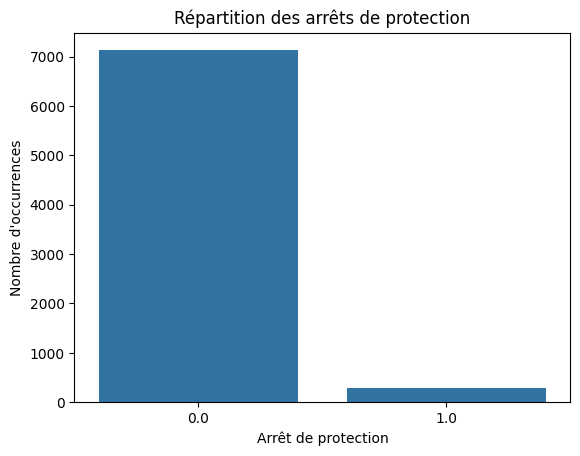

,proportion
Robot_ProtectiveStop,
0.0,96.247807
1.0,3.752193


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remplacer les NaN dans la cible si nécessaire (par exemple par 0 si on suppose qu'absence = pas d'arrêt)
df['Robot_ProtectiveStop'] = df['Robot_ProtectiveStop'].fillna(0)

# Distribution des valeurs de la cible
sns.countplot(x='Robot_ProtectiveStop', data=df)
plt.title("Répartition des arrêts de protection")
plt.xlabel("Arrêt de protection")
plt.ylabel("Nombre d'occurrences")
plt.show()

# Afficher aussi les proportions
display(df['Robot_ProtectiveStop'].value_counts(normalize=True) * 100)


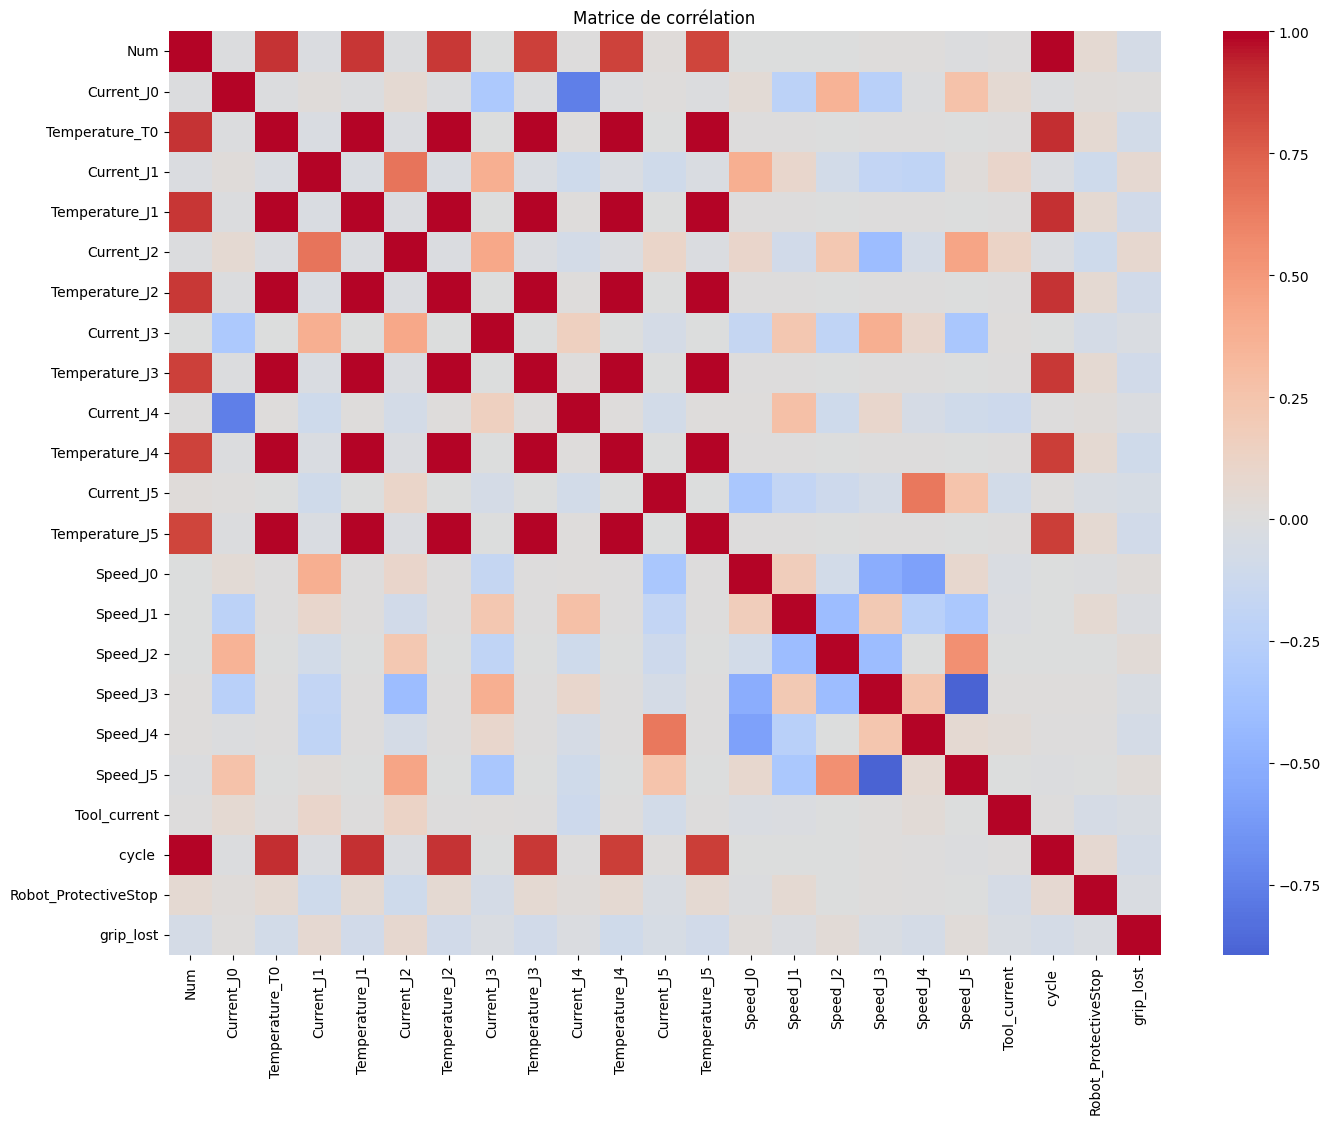

In [29]:
# Calcul de la matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)

# Affichage de la heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation")
plt.show()


In [30]:
#  afficher les 10 variables les plus corrélées avec Robot_ProtectiveStop
target_corr = correlation_matrix["Robot_ProtectiveStop"].drop("Robot_ProtectiveStop")
display(target_corr.abs().sort_values(ascending=False).head(10))


,Robot_ProtectiveStop
Current_J2,0.108846
Current_J1,0.108593
Current_J3,0.066130
cycle,0.061066
Temperature_T0,0.058712
Num,0.058608
Temperature_J1,0.058518
Temperature_J2,0.057929
Temperature_J4,0.056071
Temperature_J3,0.056048


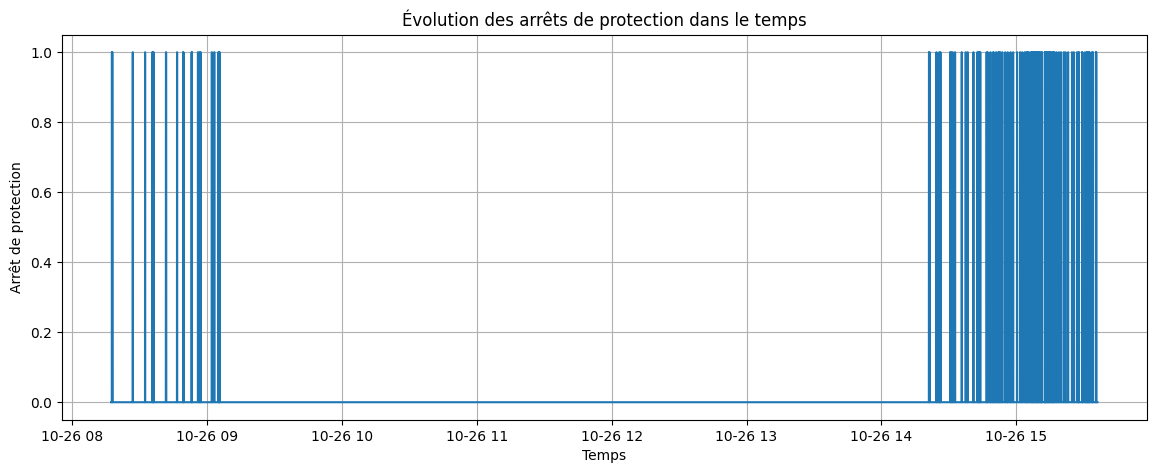

In [31]:
#  voir les arrêts au fil du temps
plt.figure(figsize=(14, 5))
plt.plot(df['Timestamp'], df['Robot_ProtectiveStop'])
plt.title("Évolution des arrêts de protection dans le temps")
plt.xlabel("Temps")
plt.ylabel("Arrêt de protection")
plt.grid(True)
plt.show()


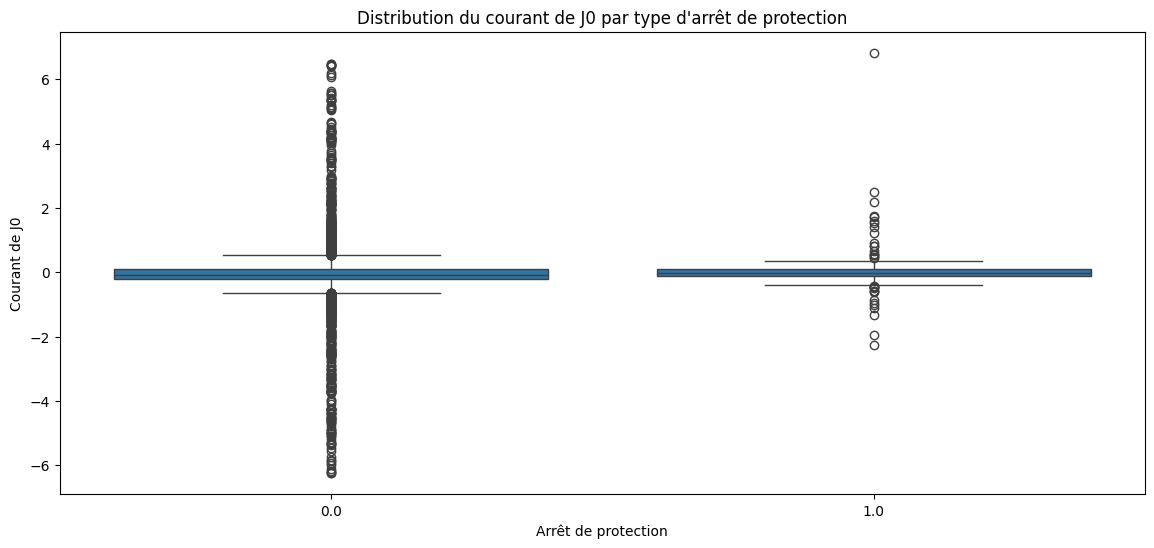

In [33]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Robot_ProtectiveStop', y='Current_J0', data=df)
plt.title("Distribution du courant de J0 par type d'arrêt de protection")
plt.xlabel("Arrêt de protection")
plt.ylabel("Courant de J0")
plt.show()
